# Homework 2 – Modeling & Evaluation

## Tasks
1. Classify the provided MNIST dataset (see files in `./data/*`) using a Decision Tree Classifier. Evaluate the model by a suitable performance metric.
* Repeat classification by applying a MLP Classifier (ANN). Which model parameters are used by default?
* Try to achieve a better result by applying a [Grid Search](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). Do you think you found the best possible solution? – Write a short statement.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv('./data/mnist_data.csv', index_col=0)
target = pd.read_csv('./data/mnist_target.csv', index_col=0)

In [3]:
data

0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.10  ...  0.599  0.600  \
0                                                         ...                 
1        0    0    0    0    0    0    0    0    0     0  ...      0      0   
2        0    0    0    0    0    0    0    0    0     0  ...      0      0   
3        0    0    0    0    0    0    0    0    0     0  ...      0      0   
4        0    0    0    0    0    0    0    0    0     0  ...      0      0   
5        0    0    0    0    0    0    0    0    0     0  ...      0      0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
69995    0    0    0    0    0    0    0    0    0     0  ...      0      0   
69996    0    0    0    0    0    0    0    0    0     0  ...      0      0   
69997    0    0    0    0    0    0    0    0    0     0  ...      0      0   
69998    0    0    0    0    0    0    0    0    0     0  ...      0      0   
69999    0    0    0    0    0    0    0    0    0     0  ...      0      0   

       0.601  0.602  0.603  0.604  0.605  0.606  0.607  0.608  
0                                                              
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
5          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
69995      0      0      0      0      0      0      0      0  
69996      0      0      0      0      0      0      0      0  
69997      0      0      0      0      0      0      0      0  
69998      0      0      0      0      0      0      0      0  
69999      0      0      0      0      0      0      0      0  

[69999 rows x 784 columns]

Jede Reihe ist ein 28x28Graustufen Bild!

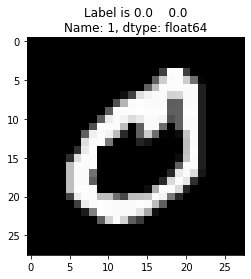

In [4]:
pixels = data.loc[1]
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
plt.title('Label is {label}'.format(label=target.loc[1]))
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
data.describe()

0.1      0.2      0.3      0.4      0.5      0.6      0.7      0.8  \
count  69999.0  69999.0  69999.0  69999.0  69999.0  69999.0  69999.0  69999.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

           0.9     0.10  ...         0.599         0.600         0.601  \
count  69999.0  69999.0  ...  69999.000000  69999.000000  69999.000000   
mean       0.0      0.0  ...      0.197417      0.099544      0.046629   
std        0.0      0.0  ...      5.991249      4.256334      2.783752   
min        0.0      0.0  ...      0.000000      0.000000      0.000000   
25%        0.0      0.0  ...      0.000000      0.000000      0.000000   
50%        0.0      0.0  ...      0.000000      0.000000      0.000000   
75%        0.0      0.0  ...      0.000000      0.000000      0.000000   
max        0.0      0.0  ...    254.000000    254.000000    253.000000   

              0.602         0.603         0.604    0.605    0.606    0.607  \
count  69999.000000  69999.000000  69999.000000  69999.0  69999.0  69999.0   
mean       0.016615      0.012957      0.001714      0.0      0.0      0.0   
std        1.561833      1.553807      0.320892      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max      253.000000    254.000000     62.000000      0.0      0.0      0.0   

         0.608  
count  69999.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  

[8 rows x 784 columns]

In [6]:
data.shape

(69999, 784)

In [7]:
target.shape

(69999, 1)

In [8]:
target.head()

0.0
0     
1  0.0
2  0.0
3  0.0
4  0.0
5  0.0

In [9]:
target = target.rename(columns={'0.0':'Target'})

In [10]:
target.describe()

Target
count  69999.000000
mean       4.452492
std        2.890167
min        0.000000
25%        2.000000
50%        4.000000
75%        7.000000
max        9.000000

# 1. Classify MNIST with Decision Tree
### 1.1. Classify the provided MNIST dataset (see files in ./data/*) using a Decision Tree Classifier

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                  target['Target'], 
                                                  test_size=0.25, 
                                                  random_state=42)

In [13]:
# Train model 
clf = DecisionTreeClassifier(max_depth=10, random_state=42)

In [14]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

array([4., 4., 8., ..., 1., 9., 7.])

### 1.2. Evaluate the model by a suitable performance metric.

In [15]:
from sklearn.metrics import f1_score
#Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
f1_score(y_test, predictions, average='macro') 

0.8508184247125321

In [16]:
# Calculate metrics globally by counting the total true positives, false negatives and false positives.
f1_score(y_test, predictions, average='micro')

0.8522285714285714

In [17]:
#Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
f1_score(y_test, predictions, average='weighted') 

0.8522238248386846

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, data, target, cv=4, scoring='accuracy')

array([0.8524    , 0.85251429, 0.84742857, 0.867421  ])

In [19]:
#cross_val_score(clf, data, target, cv=4, scoring='precision')
#cross_val_score(clf, data, target, cv=4, scoring='f1')

In [20]:
#cross_val_score(clf, data, target, cv=4, scoring='neg_root_mean_squared_error')

In [21]:
from sklearn.metrics import classification_report

In [22]:
print('Results on the test set:')
print(classification_report(y_test, predictions))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1690
         1.0       0.93      0.95      0.94      1934
         2.0       0.84      0.83      0.84      1757
         3.0       0.84      0.80      0.82      1771
         4.0       0.84      0.83      0.83      1726
         5.0       0.81      0.81      0.81      1624
         6.0       0.88      0.88      0.88      1707
         7.0       0.90      0.89      0.89      1852
         8.0       0.80      0.77      0.78      1717
         9.0       0.76      0.84      0.80      1722

    accuracy                           0.85     17500
   macro avg       0.85      0.85      0.85     17500
weighted avg       0.85      0.85      0.85     17500



# 2. Classify MNIST with ANN: 
Repeat classification by applying a MLP (Multi-Layer-Perceptron) Classifier (ANN). 

In [23]:
from sklearn.neural_network import MLPClassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, target, random_state=42)

# Due to long computation times, I slightly changed the params (rather than use the default params as requested)
ann = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(28,)).fit(X_train2, y_train2)

#hidden_layer_sizes = (28,) = 1 hidden layer with 28 nodes

/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [24]:
pred = ann.predict(X_test2)

Which model parameters are used by default?

Default Values:
- hidden_layer_sizes = (100,)
- activation = 'relu'
- solver = 'adam'
- alpha = 0.0001
- batch_size = 'auto'
- learning_rate = 0.001
- power_t = 0.5
- max_iter = 200
- shuffle = True

...

see for remaining https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html



In [25]:
#Used Params for our MLP
ann.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (28,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Evaluataion

In [26]:
#Results on Testset:
f1_score(y_test2, pred, average='macro') 

0.9351194610634241

With Cross Validation:

In [27]:
cross_val_score(ann, data, target, cv=4, scoring='accuracy')

/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed w

array([0.92617143, 0.93451429, 0.92674286, 0.93833933])

# 3. Try to achieve a better result by applying a Grid Search.
### 3.1. GridSearch

In [28]:
# Due to limitations in computational power only a small number of Params are used. (GridSearch still took over 8h) 
parameters = {'solver': ['lbfgs', 'adam'], 'max_iter': [20,200,500,1000],
              'hidden_layer_sizes': [(10,),(14,),(28,),(56,),(80,)], 'alpha': [0.0001, 0.0005]}

In [29]:
from sklearn.model_selection import GridSearchCV
gs =  GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [31]:
gs.fit(X_train2, y_train2)

/Users/FlorianGrabe/opt/anaconda3/envs/aiss/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005],
                         'hidden_layer_sizes': [(10,), (14,), (28,), (56,),
                                                (80,)],
                         'max_iter': [20, 200, 500, 1000],
                         'solver': ['lbfgs', 'adam']})

In [32]:
print("Best parameters found in GridSearch:\n", gs.best_params_)

Best parameters found in GridSearch:
 {'alpha': 0.0001, 'hidden_layer_sizes': (80,), 'max_iter': 500, 'solver': 'adam'}


In [33]:
sorted(gs.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_alpha',
 'param_hidden_layer_sizes',
 'param_max_iter',
 'param_solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [34]:
gs.cv_results_['mean_test_score']

array([0.20364253, 0.5050632 , 0.38189198, 0.86554077, 0.39337832,
       0.8649881 , 0.47806421, 0.85706371, 0.23815708, 0.77319763,
       0.40452064, 0.89226481, 0.48838768, 0.90536998, 0.48269165,
       0.90517898, 0.44759292, 0.9115983 , 0.73603258, 0.93137008,
       0.69684813, 0.92399857, 0.84592058, 0.92689381, 0.6294417 ,
       0.93287488, 0.89948401, 0.94775146, 0.92209373, 0.95102768,
       0.94186541, 0.9490848 , 0.7115554 , 0.94079887, 0.92331289,
       0.95778965, 0.94523691, 0.95980877, 0.94756095, 0.95662769,
       0.19158561, 0.5140285 , 0.29415705, 0.81904555, 0.39528499,
       0.89207396, 0.50736281, 0.87927379, 0.26987194, 0.67431781,
       0.46284567, 0.9098648 , 0.45955151, 0.91106503, 0.36941996,
       0.9048748 , 0.41964744, 0.90877898, 0.65290645, 0.93131293,
       0.80092987, 0.92742704, 0.82559696, 0.93079877, 0.61454344,
       0.93396062, 0.91020769, 0.95017051, 0.91089286, 0.95251337,
       0.93323686, 0.94997996, 0.68942313, 0.9406655 , 0.93615

In [35]:
gs.cv_results_['std_fit_time']

array([1.46083952e+00, 1.67817472e+00, 1.61574004e+01, 4.09540764e+01,
       2.89950901e+01, 7.00960508e+01, 3.67503373e+02, 3.31561195e+01,
       3.20593255e+00, 1.21668858e+00, 3.90323365e+01, 4.69668826e+01,
       1.21080546e+02, 3.74422090e+01, 4.19562466e+02, 6.03799113e+01,
       1.18147058e+00, 1.03989738e+00, 6.62494489e+00, 4.02849916e+01,
       4.10068086e+00, 4.31518896e+01, 2.17679302e+01, 1.70538144e+01,
       1.66754661e+00, 7.25452863e-01, 6.94129536e+00, 1.34931234e+01,
       1.58156686e+01, 5.16414361e+01, 1.81563986e+01, 5.53329535e+01,
       1.24300728e+00, 2.83863208e-01, 1.19481653e+01, 5.13022353e+01,
       7.08104698e+00, 3.00817636e+01, 1.21426531e+01, 2.95065589e+01,
       3.76636238e+00, 1.03067440e+00, 1.00641174e+02, 5.97893817e+01,
       8.73423620e+01, 7.01715861e+01, 2.64994044e+01, 6.46251464e+01,
       1.05414228e+00, 1.19501763e+00, 1.37008651e+01, 3.26951062e+01,
       2.50204814e+01, 1.44516874e+02, 4.10940566e+02, 5.93958876e+01,
      

In [36]:
gs.cv_results_['std_score_time']

array([0.02115635, 0.0108494 , 0.03305881, 0.0647652 , 0.12527216,
       0.02261975, 0.03943586, 0.01614816, 0.01896591, 0.01467915,
       0.02913426, 0.02004225, 0.03439027, 0.02549072, 0.01207331,
       0.0689361 , 0.08760155, 0.02567139, 0.03107523, 0.0247249 ,
       0.00819236, 0.01543353, 0.02501136, 0.03072785, 0.02482505,
       0.02238586, 0.01693313, 0.02822211, 0.0288339 , 0.00849071,
       0.02275716, 0.01869439, 0.03443704, 0.0487725 , 0.06283105,
       0.0240419 , 0.02173004, 0.01903062, 0.02465483, 0.02829101,
       0.02004248, 0.01502141, 0.01752751, 0.00985968, 0.01968839,
       0.05568943, 0.02559222, 0.04268578, 0.02168065, 0.01302936,
       0.02192605, 0.01336157, 0.03936567, 0.13059548, 0.01511033,
       0.03534123, 0.01351707, 0.01784214, 0.02454357, 0.01461096,
       0.0122536 , 0.15627618, 0.01533861, 0.01765718, 0.01904384,
       0.02906976, 0.0409001 , 0.02392681, 0.03858711, 0.01364962,
       0.02286319, 0.06164395, 0.03624256, 0.03247812, 0.03563

In [37]:
# Performance on TestSet:
y_pred_gs = gs.predict(X_test2)

In [38]:
print(classification_report(y_test2, y_pred_gs))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1690
         1.0       0.98      0.98      0.98      1934
         2.0       0.95      0.96      0.96      1757
         3.0       0.96      0.93      0.95      1771
         4.0       0.96      0.96      0.96      1726
         5.0       0.95      0.95      0.95      1624
         6.0       0.96      0.98      0.97      1707
         7.0       0.96      0.96      0.96      1852
         8.0       0.92      0.94      0.93      1717
         9.0       0.94      0.94      0.94      1722

    accuracy                           0.96     17500
   macro avg       0.96      0.96      0.96     17500
weighted avg       0.96      0.96      0.96     17500



### 3.2. Do you think you found the best possible solution? – Write a short statement.

We may have found a better solution, but certainly not the best possible solution. With GridSearch only a small number of discrete points in the Hyperparamter Grid are tried and explored, while large areas of the overall grid, inbetween the chosen points, are left unexplored. This is especially true for continuous parameters. Furthermore, due to time and computation power constraints the number of explored parameters in this case were rather small. Also algorithms like SGD will often only identify locally optimal points rather than find the global optimum.